In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [58]:
images = []
ages = []
genders = []

for i in os.listdir('C:/Users/zhara/Downloads/AML_final/UTKFace')[0:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    # Use os.path.join to concatenate directory and file name
    file_path = os.path.join('C:/Users/zhara/Downloads/AML_final/UTKFace', i)
    # Open the image and append to the list, ensuring it gets closed
    with Image.open(file_path) as img:
        images.append(np.array(img))


In [59]:

images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df


,Images,Ages,Genders
0,"[[[215, 206, 201], [213, 204, 199], [212, 203,...",100,0
1,"[[[118, 122, 133], [120, 124, 135], [122, 126,...",100,0
2,"[[[219, 223, 226], [232, 235, 240], [232, 237,...",100,1
3,"[[[78, 82, 93], [78, 82, 93], [78, 82, 93], [7...",100,1
4,"[[[65, 69, 80], [66, 70, 81], [67, 71, 82], [6...",100,1
...,...,...,...
7995,"[[[216, 217, 209], [222, 223, 215], [228, 227,...",27,0
7996,"[[[142, 101, 73], [139, 98, 70], [134, 93, 65]...",27,0
7997,"[[[89, 59, 31], [92, 62, 34], [97, 66, 37], [1...",27,0
7998,"[[[120, 120, 120], [120, 120, 120], [120, 120,...",27,0


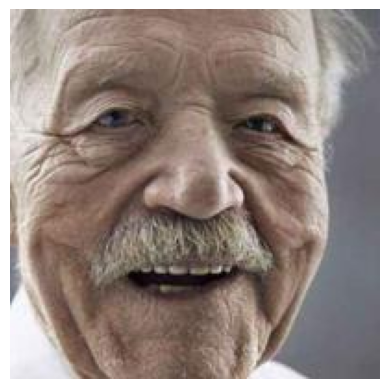

Age: 100
Gender: 0


In [60]:
import matplotlib.pyplot as plt

# Display the image from the DataFrame
plt.imshow(df['Images'][0])
plt.axis('off')  # Turn off axes for better visualization
plt.show()

# Print age and gender
print("Age:", df['Ages'][0])
print("Gender:", df['Genders'][0])


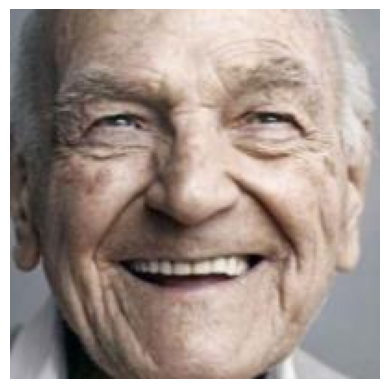

Age: 100
Gender: 0


In [61]:
plt.imshow(df['Images'][1])  
plt.axis('off')
plt.show()
print("Age:", df['Ages'][1])
print("Gender:", df['Genders'][1])

C:\Users\zhara\AppData\Local\Temp\ipykernel_20596\409036286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

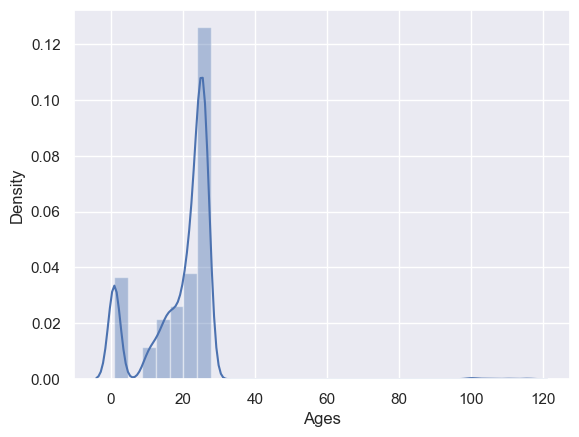

In [62]:
sns.set_theme()
sns.distplot(df['Ages'],kde=True, bins=30)

Too many faces of people between 0 and 4 years old. The model would fit too well to these ages and not enough to the other ages. To resolve this I'm only going to include a third of the images between these ages.

In [63]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index = True)


C:\Users\zhara\AppData\Local\Temp\ipykernel_20596\1853336140.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

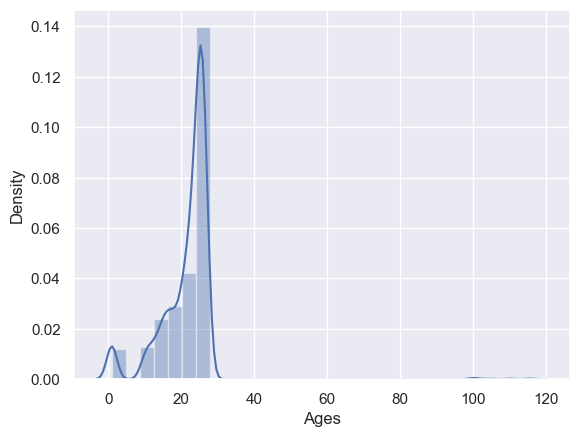

In [64]:
sns.distplot(df['Ages'],kde=True, bins=30)


In [65]:
df = df[df['Ages'] < 80]

C:\Users\zhara\AppData\Local\Temp\ipykernel_20596\2749225890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=20)


<Axes: xlabel='Ages', ylabel='Density'>

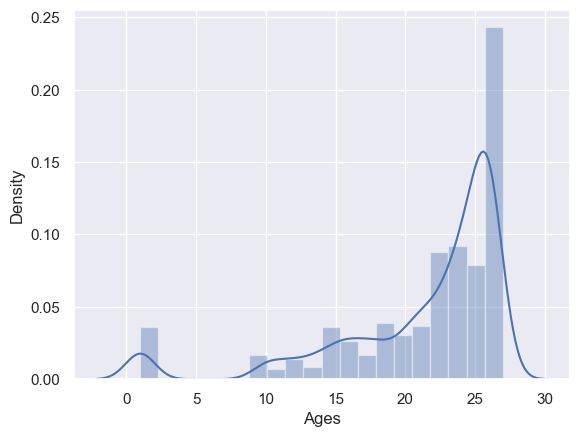

In [66]:
sns.distplot(df['Ages'],kde=True, bins=20)

C:\Users\zhara\AppData\Local\Temp\ipykernel_20596\2544185888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Genders'], palette='pastel')  # Create the countplot


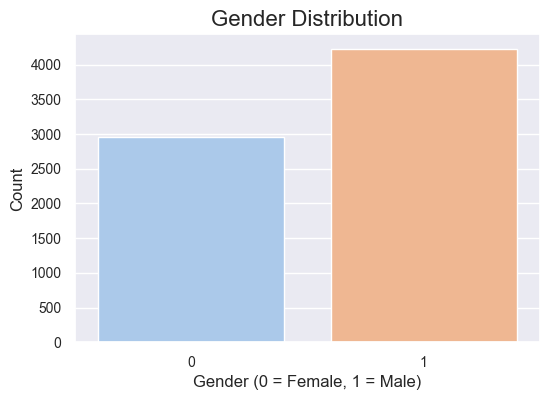

In [67]:

plt.figure(figsize=(6, 4))  # Adjust figure size for better readability
sns.countplot(x=df['Genders'], palette='pastel')  # Create the countplot
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [68]:
df = df[df['Genders'] != 3]

In [69]:
from PIL import Image
import numpy as np

x = []
y = []

for i in range(len(df)):
    try:
        # Ensure the image is a PIL Image
        if not isinstance(df['Images'].iloc[i], Image.Image):
            img = Image.fromarray(df['Images'].iloc[i])  # Convert array back to PIL Image
        else:
            img = df['Images'].iloc[i]
        
        # Convert to RGB to ensure consistency
        img = img.convert('RGB')  # Ensures 3 channels for all images
        
        # Resize the image using LANCZOS
        resized_img = img.resize((200, 200), Image.Resampling.LANCZOS)
        
        # Convert the resized image to a numpy array
        ar = np.asarray(resized_img)
        
        # Ensure the array has the correct shape (200, 200, 3)
        if ar.shape[:2] == (200, 200):
            x.append(ar)
        else:
            print(f"Skipping image at index {i}: Unexpected shape {ar.shape}")
        
        # Prepare age and gender labels
        agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
        y.append(agegen)
    
    except Exception as e:
        print(f"Error processing image at index {i}: {e}")

# Convert to numpy arrays
x = np.array(x, dtype=np.float32)  # Ensure a consistent data type
y = np.array(y, dtype=np.int32)    # Ensure a consistent data type

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (7182, 200, 200, 3)
Shape of y: (7182, 2)


In [70]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)


In [71]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
             optimizer=optimizers.Adam(learning_rate=0.0001))

genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

C:\Users\zhara\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

history1 = agemodel.fit(train1, epochs=25, shuffle=True, validation_data=test1)

Epoch 1/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 104s 576ms/step - loss: 55.8300 - val_loss: 36.1023
Epoch 2/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 102s 568ms/step - loss: 55.0788 - val_loss: 33.2094
Epoch 3/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 102s 567ms/step - loss: 52.0072 - val_loss: 30.7109
Epoch 4/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 103s 568ms/step - loss: 49.9587 - val_loss: 28.4944
Epoch 5/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 102s 563ms/step - loss: 49.6121 - val_loss: 28.8553
Epoch 6/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 102s 565ms/step - loss: 50.4899 - val_loss: 27.7280
Epoch 7/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 102s 565ms/step - loss: 50.0040 - val_loss: 28.3239
Epoch 8/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 102s 564ms/step - loss: 48.6657 - val_loss: 29.4077
Epoch 9/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 103s 568ms/step - loss: 48.4879 - val_loss: 25.8972
Epoch 10/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 101s 562ms/step - loss: 47.5279 - val_loss: 25.4723
Epoch 11/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 103s 569ms/step - loss: 46.8598 - val_

In [74]:
agemodel.save('age_model.keras')
print("Модель для возраста успешно сохранена как 'age_model.h5'")

Модель для возраста успешно сохранена как 'age_model.h5'


In [75]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = genmodel.fit(train2, epochs=25, shuffle=True, validation_data=test2)

Epoch 1/25
57/90 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6113 - loss: 0.6607

KeyboardInterrupt: 

In [ ]:
genmodel.save('gender_model.keras')
print("Модель для пола успешно сохранена как 'gender_model.keras'")


In [ ]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.Resampling.LANCZOS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.Resampling.LANCZOS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.Resampling.LANCZOS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = agemodel.predict(ar)
    gender = np.round(genmodel.predict(ar))
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'
        
    print('Age:', int(age), '\n Gender:', gender)
    return im.resize((300,300), Image.Resampling.LANCZOS)

In [ ]:
process_and_predict('C:/Users/zhara/Downloads/AML_final/train/photo_2022-06-23_16-10-15.jpg')

In [ ]:
process_and_predict('C:/Users/zhara/Downloads/AML_final/train/1.jpg')